LSTM Model to predict stock price movement direction

In [1]:
!pip install tensorflow

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from time import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/data_with_attention_scores.csv')

In [7]:
features = ['Open','High','Low','Close','Volume','Prev_Close','Price_Change',
            'MA_5','MA_20','Rolling_Volatility_5','Rolling_Volatility_20','RSI_14',
            'prev_return_1','prev_return_2','attention_score']

In [20]:
look_back = 10
batch_size = 16
epochs = 50

In [15]:
def create_sequences(data, target, look_back):
    X, y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:i+look_back])
        y.append(target[i+look_back])
    return np.array(X), np.array(y)

Processing Infosys...
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5421 - loss: 0.7152 - val_accuracy: 0.6271 - val_loss: 0.6654
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5581 - loss: 0.6836 - val_accuracy: 0.6949 - val_loss: 0.6487
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6428 - loss: 0.6703 - val_accuracy: 0.7627 - val_loss: 0.6329
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6718 - loss: 0.6663 - val_accuracy: 0.7288 - val_loss: 0.6190
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6828 - loss: 0.6309 - val_accuracy: 0.7288 - val_loss: 0.6088
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6734 - loss: 0.6294 - val_accuracy: 0.7288 - val_loss: 0.5958
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6540 - loss: 0.6415 - val_accuracy: 0.7288 - val_loss: 0.5902
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6729 - loss: 0.6190 - val

Infosys Prediction Accuracy: 0.7816


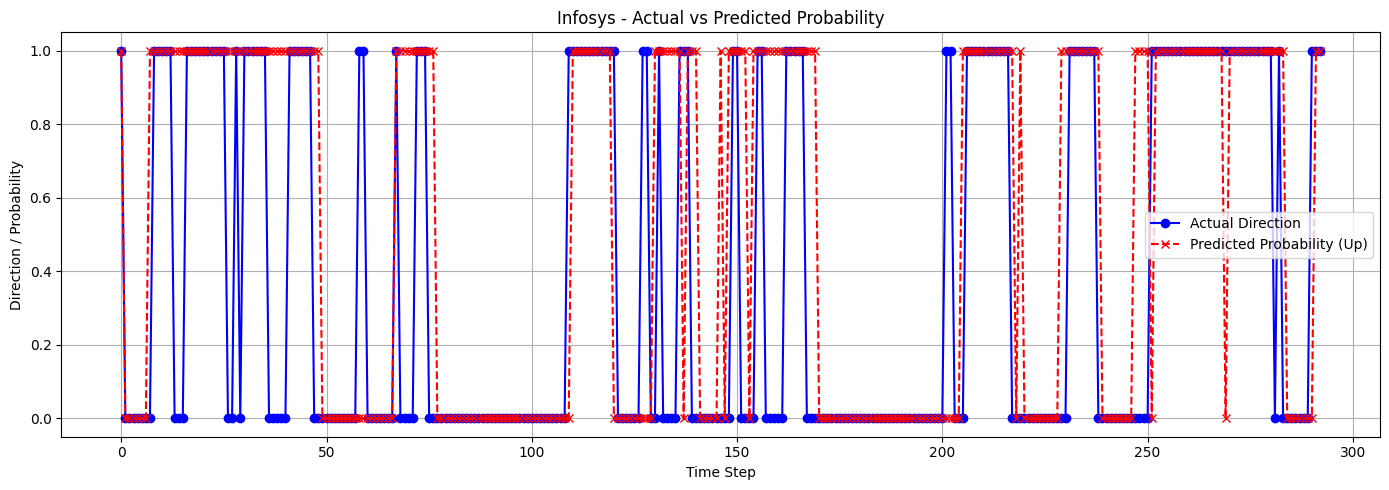

Infosys Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       177
           1       0.67      0.90      0.76       116

    accuracy                           0.78       293
   macro avg       0.79      0.80      0.78       293
weighted avg       0.82      0.78      0.78       293



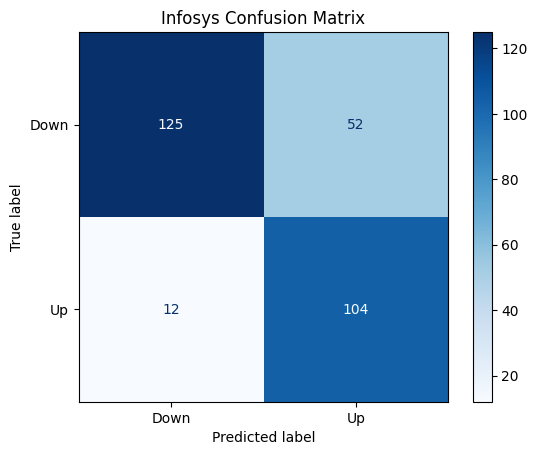

Processing Reliance...
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4477 - loss: 0.6988 - val_accuracy: 0.2432 - val_loss: 0.7064
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6710 - loss: 0.6906 - val_accuracy: 0.3784 - val_loss: 0.7017
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7419 - loss: 0.6424 - val_accuracy: 0.6486 - val_loss: 0.6942
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7938 - loss: 0.5692 - val_accuracy: 0.7297 - val_loss: 0.6834
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8199 - loss: 0.5484 - val_accuracy: 0.7027 - val_loss: 0.6737
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8072 - loss: 0.5290 - val_accuracy: 0.7027 - val_loss: 0.6605
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8093 - loss: 0.5178 - val_accuracy: 0.7027 - val_loss: 0.6501
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8111 - loss: 0.5204 - v

Reliance Prediction Accuracy: 0.7568


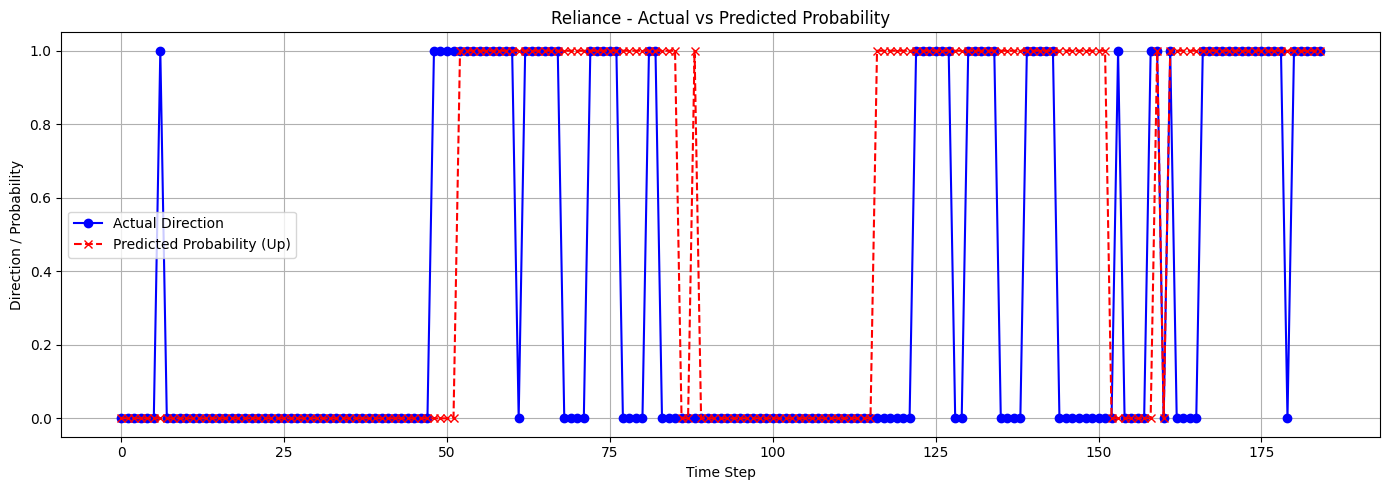

Reliance Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       120
           1       0.60      0.89      0.72        65

    accuracy                           0.76       185
   macro avg       0.76      0.79      0.75       185
weighted avg       0.81      0.76      0.76       185



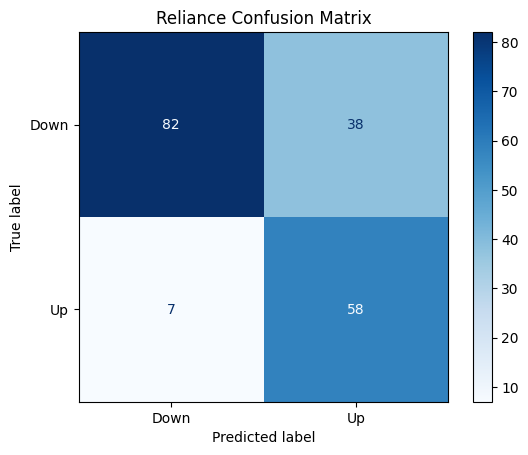

Processing SBI...
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5685 - loss: 0.6680 - val_accuracy: 0.5534 - val_loss: 0.6799
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8015 - loss: 0.5864 - val_accuracy: 0.5243 - val_loss: 0.7142
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7963 - loss: 0.5084 - val_accuracy: 0.5243 - val_loss: 0.7952
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7666 - loss: 0.4782 - val_accuracy: 0.5243 - val_loss: 0.8066
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8206 - loss: 0.4491 - val_accuracy: 0.5340 - val_loss: 0.8044
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7919 - loss: 0.4671 - val_accuracy: 0.5340 - val_loss: 0.8503
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8319 - loss: 0.4097 - val_accuracy: 0.5631 - val_loss: 0.8336
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8289 - loss: 0.4041 - val_accuracy

SBI Prediction Accuracy: 0.7490


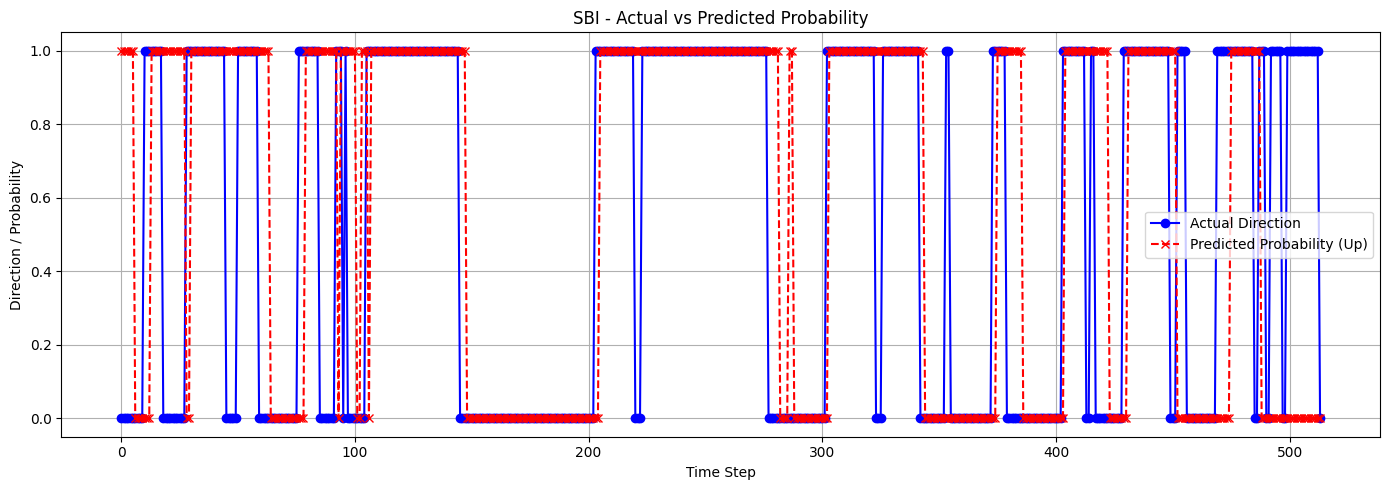

SBI Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       237
           1       0.74      0.82      0.78       277

    accuracy                           0.75       514
   macro avg       0.75      0.74      0.74       514
weighted avg       0.75      0.75      0.75       514



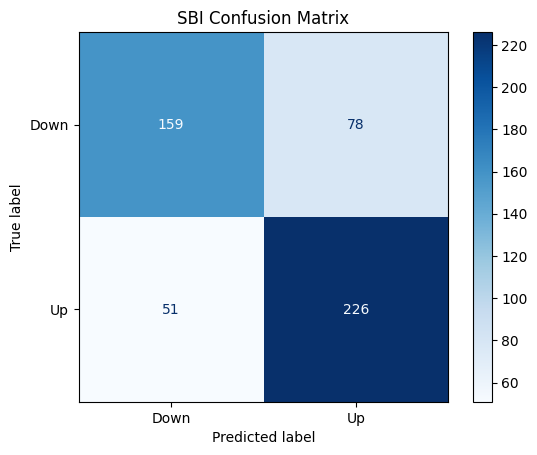

Saved all predictions to predicted_stock_data.csv


In [23]:
companies = df['Company'].unique()
all_preds = []

for company in companies:
    print(f"Processing {company}...")
    company_df = df[df['Company']==company].sort_values('Trading_Date')
    company_df = company_df.fillna(0)
    data = company_df[features].values.astype('float32')
    target = company_df['Target'].values.astype('int32')
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)

    X, y = create_sequences(data, target, look_back=look_back)
    X = X.reshape((X.shape[0], look_back, len(features)))

    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    class_weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weights = dict(enumerate(class_weights))

    model = Sequential()
    model.add(LSTM(16, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test),
                        class_weight=class_weights,
                        callbacks=[early_stop], verbose=1)

    # Predict probabilities
    y_pred_prob_test = model.predict(X_test).flatten()
    y_pred_test = (y_pred_prob_test > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred_test)
    print(f"{company} Test Accuracy: {acc:.4f}")

    y_pred_prob = model.predict(X).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)
    acc = accuracy_score(y, y_pred)
    print(f"{company} Prediction Accuracy: {acc:.4f}")

    company_df = company_df.iloc[look_back:].copy()
    company_df['predicted_probability'] = y_pred_prob
    company_df['predicted_direction'] = ['Up' if x==1 else 'Down' for x in y_pred]

    all_preds.append(company_df)

    model.save(f'/content/drive/MyDrive/{company}_lstm.h5')

    plt.figure(figsize=(14,5))

    plt.plot(range(len(y)), y, label='Actual Direction', marker='o', linestyle='-', color='blue')
    plt.plot(range(len(y_pred)), y_pred, label='Predicted Probability (Up)', marker='x', linestyle='--', color='red')

    plt.title(f'{company} - Actual vs Predicted Probability')
    plt.xlabel('Time Step')
    plt.ylabel('Direction / Probability')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/{company}_prob_predictions.png')
    plt.show()

    print(f"{company} Classification Report:")
    print(classification_report(y, y_pred))

    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Down', 'Up'])
    disp.plot(cmap='Blues')
    plt.title(f"{company} Confusion Matrix")
    plt.savefig(f'/content/drive/MyDrive/{company}_confusion_matrix.png')
    plt.show()

final_df = pd.concat(all_preds)
final_df.to_csv('/content/drive/MyDrive/predicted_stock_data.csv', index=False)
print("Saved all predictions to predicted_stock_data.csv")